 # Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Maulana Adiatma]
- **Batch:** [2024]
- **Major:** [Sistem Informasi]

## Landasan Teori

- Peran Analisis Data pada Pengambilan Keputusan
Menurut saya Analisis data adalah prsoes melihat data, pembersihan data (data cleaning) dan pemodelan data dengan tujuan menemukan informasi yang berguna, menginformasikan kesimpulan, dan mendukung pengambilan keputusan. Tujuan analisis data ini berguna untuk mengambil sebuah decision berdasarkan fakta daripada intuisi, sehingga meminimalkan resiko terjadinya kesalahan dalam pengambilan keputusan

- EDA & Descriptive Analysis
Menurut saya Descriptive Analysis merupakan sesuatu hal ketetapan yang bisa kita dapat informasi nya, dimana pada saat kita melakukan .describe() dan .info() untuk mengetahui data tersebut memiliki fakta apa yang ada didalamnya, berbeda dengan Exploratory Data dimana kita setelah mengetahui data tersebut kita mengeksplor data yang kita miliki lebih dalam mungkin melalui visualisasi trus melihat keterhubungan antara 1 kolom dengan kolom yang lain 

- Data Cleaning & Wrangling
Mengenai hal ini, Data Cleaning sangat penting dilakukan untuk mengetahui apakah data yang kita miliki itu ada yang missing value, duplikat dan outlier yang jauh dari titik data lainnya yang dimana fungsi dari data cleaning ini agar pada saat model ML dibuat itu lebih akurat dan pada saat analisis minim terjadi kesalahan. setelah melakukan Cleaning kita melakukan wrangling yang dimana salah satu hal yang dilakukan adalah Feature Engineering untuk membuat kolom keterhubungan antara 2 kolom, hal ini dilakukan untuk menyesuaikan agar kolom ini relevan dengan insight kebutuhan analisis / model ML

- Peran Visualisasi
Simple aja ini sebagai jembatan antara data yang kita miliki dan pemahaman kita sebagai manusia. Insight yang rumit bisa disampaikan lebih cepat, jelas, dan mudah dipahami lewat visual yang tepat. biasanya dalam bentuk chart.


## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah penyewaan sepeda dari tahun 2011 - 2012?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [316]:
FramePertama = pd.read_csv('day.csv')
FramePertama.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
636,637,2012-09-28,4,1,9,0,5,1,2,0.619167,0.585863,0.690000,0.164179,1045,6370,7415
350,351,2011-12-17,4,0,12,0,6,0,2,0.258333,0.249371,0.560833,0.243167,275,2464,2739
198,199,2011-07-18,3,0,7,0,1,1,1,0.746667,0.703925,0.651250,0.215804,841,3617,4458
39,40,2011-02-09,1,0,2,0,3,1,2,0.134783,0.144283,0.494783,0.188839,53,1552,1605
307,308,2011-11-04,4,0,11,0,5,1,2,0.403333,0.403392,0.622500,0.271779,470,3576,4046


**Insight:**
Kali ini saya mengambil Bike Sharing Dataset berisi data penyewaan sepeda harian.
- Setiap baris = 1 hari
- Setiap kolom = informasi kondisi hari itu
- Terdiri dari 16 kolom

### Assessing Data

In [317]:
FramePertama.shape
FramePertama.info()
FramePertama.describe()
FramePertama.isnull().sum()
FramePertama.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


np.int64(0)

### Melihat Unique Value pada beberapa kolom

In [318]:
FramePertama['season'].unique()
FramePertama['yr'].unique()
FramePertama['mnth'].unique()
FramePertama['holiday'].unique()
FramePertama['weekday'].unique()
FramePertama['workingday'].unique()
FramePertama['weathersit'].unique()

array([2, 1, 3])

**Insight:**
- Duplikasi = 0 (tidak ada)
- Missing Value = 0 (Tidak ada)
- Tidak butuh Transformasi data (koreksi jika salah)

Penjelasan Kolom yang dimiliki beserta maksud dari setiap Kolom tersebut
- dteday = Tanggal
- season = Musim pada tanggal tersebut (1=Spring, 2=Summer, 3=Fall, 4=Winter)
- yr = Tahun (0=2011, 1=2012 data ini tersedia hanya dari tahun 2011 - 2012)
- mnth = Bulan (1–12) konteks nya sama kayak bulan januari - Desember
- holiday = Apakah hari libur pada tanggal tersebut (0=tidak, 1=ya)
- weekday = Hari tanggal tersebut (0=Sunday, 1=Monday, 2=Tuesday, 3=Wednesday, 4=Thursday, 5=Friday, 6=Saturday)
- workingday = Hari kerja atau bukan (0=tidak, 1=ya)
- weathersit = Kondisi cuaca (1=cuaca bagus, 2=cuaca sedang, 3=cuaca buruk)
- temp = Suhu yang sudah di normalisasi menjadi celcius
- atemp = Suhu terasa (celcius)
- hum = Kelembapan udara (0 sampai 1)
- windspeed = Kecepatan angin
- casual = Penyewa non-member
- registered = Penyewa member
- cnt = Total peminjaman

### Cleaning Data

In [319]:
FramePertama['dteday'] = pd.to_datetime(FramePertama['dteday'])
FramePertama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Penyesuaian dilakukan pada kolom tanggal (dteday) dengan mengubah tipe data menjadi format datetime agar memudahkan analisis berbasis waktu.

## Exploratory Data Analysis (EDA)

### Explore ...

In [320]:
# Tambahan kolom
FramePertama['year'] = FramePertama['dteday'].dt.year
FramePertama['month'] = FramePertama['dteday'].dt.month

# mapping
month_map = {
    1: 'Januari', 
    2: 'Februari', 
    3: 'Maret', 
    4: 'April',
    5: 'Mei', 
    6: 'Juni', 
    7: 'Juli', 
    8: 'Agustus',
    9: 'September', 
    10: 'Oktober', 
    11: 'November', 
    12: 'Desember'
}

weather_category = {
    1: 'Baik',
    2: 'Sedang',
    3: 'Buruk',
    4: 'Buruk Sekali'
}

season_map = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

In [321]:
# Total sewaan per tahun
JumlahTotal = FramePertama.groupby(FramePertama['year'])['cnt'].sum().reset_index()
JumlahTotal

,year,cnt
0,2011,1243103
1,2012,2049576


In [322]:
#Cek penyewaan sepeda perbulan dalam setiap tahunnya
tahun2011 = FramePertama[FramePertama['year'] == 2011].groupby('month')['cnt'].sum().reset_index()
total_2011 = FramePertama[FramePertama['year'] == 2011]['cnt'].sum()
tahun2011['bulan'] = tahun2011['month'].map(month_map)
tahun2011

tahun2012 = FramePertama[FramePertama['year'] == 2012].groupby('month')['cnt'].sum().reset_index()
total_2012 = FramePertama[FramePertama['year'] == 2012]['cnt'].sum()
tahun2012['bulan'] = tahun2012['month'].map(month_map)
tahun2012

# Gabungkan data penyewaan sepeda per bulan untuk kedua tahun
perbulan_tahun= (FramePertama.assign(year=FramePertama['dteday'].dt.year, month=FramePertama['dteday'].dt.month).groupby(['year', 'month'])['cnt'].sum().reset_index())
perbulan_tahun

,year,month,cnt
0,2011,1,38189
1,2011,2,48215
2,2011,3,64045
3,2011,4,94870
4,2011,5,135821
5,2011,6,143512
6,2011,7,141341
7,2011,8,136691
8,2011,9,127418
9,2011,10,123511


In [323]:
# cek penyewaan sepeda berdasarkan kondisi cuaca
weather_stats = (FramePertama.groupby('weathersit').agg(day_total=('cnt', 'size'),total_rental=('cnt', 'sum'),).reset_index())
weather_stats

# cek penyewaan sepeda berdasarkan musim
season_stats = (FramePertama.groupby('season').agg(day_total=('cnt', 'size'),total_rental=('cnt', 'sum'),).reset_index())
season_stats

,season,day_total,total_rental
0,1,181,471348
1,2,184,918589
2,3,188,1061129
3,4,178,841613


In [324]:
# cek penyewaan sepeda berdasarkan kondisi cuaca dan musim
FramePertama['weather_category'] = FramePertama['weathersit'].map(weather_category)
weather_season_count = (FramePertama.groupby(['season', 'weather_category']).size().reset_index(name='day_total'))
weather_season_count['season_name'] = weather_season_count['season'].map(season_map)
weather_season_count


,season,weather_category,day_total,season_name
0,1,Baik,111,Spring
1,1,Buruk,4,Spring
2,1,Sedang,66,Spring
3,2,Baik,113,Summer
4,2,Buruk,3,Summer
5,2,Sedang,68,Summer
6,3,Baik,136,Fall
7,3,Buruk,4,Fall
8,3,Sedang,48,Fall
9,4,Baik,103,Winter


In [325]:
# cek penyewaan sepeda berdasarkan kondisi cuaca, musim, dan bulan untuk tahun 2011 sekaligus mengetahuir rata penyewaan per hari
weather_full_2011 = (FramePertama[FramePertama['year'] == 2011].groupby(['season', 'month', 'weather_category']).agg(day_total=('cnt', 'size'),total_rental=('cnt', 'sum'),rata_perhari=('cnt', 'mean'),).reset_index())
weather_full_2011['season_name'] = weather_full_2011['season'].map(season_map)
weather_full_2011['bulan'] = weather_full_2011['month'].map(month_map)
weather_full_2011

,season,month,weather_category,day_total,total_rental,rata_perhari,season_name,bulan
0,1,1,Baik,17,21004,1235.529412,Spring,Januari
1,1,1,Buruk,1,506,506.000000,Spring,Januari
2,1,1,Sedang,13,16679,1283.000000,Spring,Januari
3,1,2,Baik,19,35190,1852.105263,Spring,Februari
4,1,2,Sedang,9,13025,1447.222222,Spring,Februari
5,1,3,Baik,12,27841,2320.083333,Spring,Maret
6,1,3,Buruk,1,623,623.000000,Spring,Maret
7,1,3,Sedang,7,12742,1820.285714,Spring,Maret
8,1,12,Baik,8,15500,1937.500000,Spring,Desember
9,1,12,Sedang,3,6890,2296.666667,Spring,Desember


In [326]:
# cek penyewaan sepeda berdasarkan kondisi cuaca, musim, dan bulan untuk tahun 2012 sekaligus mengetahuir rata penyewaan per hari
weather_full_2012 = (FramePertama[FramePertama['year'] == 2012].groupby(['season', 'month', 'weather_category']).agg(day_total=('cnt', 'size'),total_rental=('cnt', 'sum'),rata_perhari=('cnt', 'mean'),).reset_index())
weather_full_2012['season_name'] = weather_full_2012['season'].map(season_map)
weather_full_2012['bulan'] = weather_full_2012['month'].map(month_map)
weather_full_2012

,season,month,weather_category,day_total,total_rental,rata_perhari,season_name,bulan
0,1,1,Baik,20,66387,3319.350000,Spring,Januari
1,1,1,Sedang,11,30357,2759.727273,Spring,Januari
2,1,2,Baik,18,69858,3881.000000,Spring,Februari
3,1,2,Buruk,1,2169,2169.000000,Spring,Februari
4,1,2,Sedang,10,31110,3111.000000,Spring,Februari
5,1,3,Baik,14,70924,5066.000000,Spring,Maret
6,1,3,Sedang,6,29935,4989.166667,Spring,Maret
7,1,12,Baik,3,5332,1777.333333,Spring,Desember
8,1,12,Buruk,1,441,441.000000,Spring,Desember
9,1,12,Sedang,7,14835,2119.285714,Spring,Desember


In [327]:
# total penyewaan per kondisi cuaca per tahun
cuaca_tahun = (FramePertama.groupby(['year', 'weather_category'])['cnt'].sum().reset_index())
cuaca_2011 = cuaca_tahun[cuaca_tahun['year'] == 2011]
cuaca_2011

cuaca_2012 = cuaca_tahun[cuaca_tahun['year'] == 2012]
cuaca_2012

,year,weather_category,cnt
3,2012,Baik,1422885
4,2012,Buruk,12757
5,2012,Sedang,613934


In [328]:
# total hari per kondisi cuaca per tahun
hari_cuaca = (FramePertama.groupby(['year', 'weather_category']).size().reset_index(name='total_hari'))

hari_2011 = hari_cuaca[hari_cuaca['year'] == 2011].set_index('weather_category')
hari_2011

hari_2012 = hari_cuaca[hari_cuaca['year'] == 2012].set_index('weather_category')
hari_2012

,year,total_hari
weather_category,,
Baik,2012,237
Buruk,2012,6
Sedang,2012,123


In [329]:
# cek penyewaan sepeda berdasarkan kondisi cuaca dan bulan untuk tahun 2011 & 2012
data_bulan_cuaca2011 = (weather_full_2011.groupby(['bulan', 'weather_category'])['day_total'].sum().reset_index())
data_bulan_cuaca2011

data_bulan_cuaca2012 = (weather_full_2012.groupby(['bulan', 'weather_category'])['day_total'].sum().reset_index())
data_bulan_cuaca2012

,bulan,weather_category,day_total
0,Agustus,Baik,20
1,Agustus,Sedang,11
2,April,Baik,23
3,April,Buruk,1
4,April,Sedang,6
5,Desember,Baik,12
6,Desember,Buruk,1
7,Desember,Sedang,18
8,Februari,Baik,18
9,Februari,Buruk,1


In [330]:
# cek rata penyewaan sepeda berdasarkan kondisi cuaca dan bulan untuk tahun 2011 & 2012
rata_bulan_cuaca2011 = (weather_full_2011.groupby(['bulan', 'weather_category'])['rata_perhari'].mean().reset_index())
rata_bulan_cuaca2011

rata_bulan_cuaca2012 = (weather_full_2012.groupby(['bulan', 'weather_category'])['rata_perhari'].mean().reset_index())
rata_bulan_cuaca2012

,bulan,weather_category,rata_perhari
0,Agustus,Baik,7172.700000
1,Agustus,Sedang,6459.000000
2,April,Baik,6293.782609
3,April,Buruk,1027.000000
4,April,Sedang,4740.000000
5,Desember,Baik,3719.666667
6,Desember,Buruk,441.000000
7,Desember,Sedang,3429.961039
8,Februari,Baik,3881.000000
9,Februari,Buruk,2169.000000


In [331]:
#cek total penyewaan sepeda berdasarkan kondisi cuaca dan bulan untuk tahun 2011 & 2012
total_bulan_cuaca2011 = (weather_full_2011.groupby(['bulan', 'weather_category'])['total_rental'].sum().reset_index())
total_bulan_cuaca2011

total_bulan_cuaca2012 = (weather_full_2012.groupby(['bulan', 'weather_category'])['total_rental'].sum().reset_index())
total_bulan_cuaca2012

,bulan,weather_category,total_rental
0,Agustus,Baik,143454
1,Agustus,Sedang,71049
2,April,Baik,144757
3,April,Buruk,1027
4,April,Sedang,28440
5,Desember,Baik,56290
6,Desember,Buruk,441
7,Desember,Sedang,66982
8,Februari,Baik,69858
9,Februari,Buruk,2169


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah penyewaan sepeda dari tahun 2011 - 2012?

#### Visualisasi 1: Perbandingan Penyewaan setiap tahun

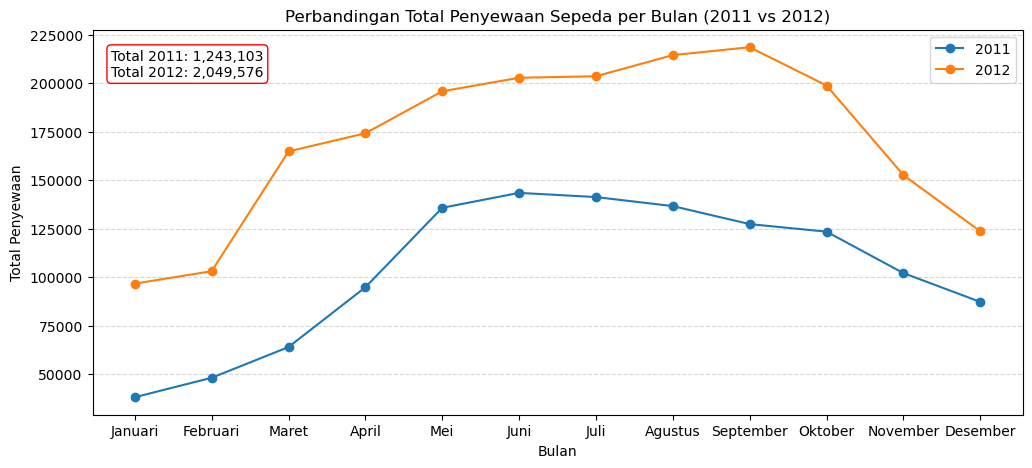

In [332]:
plt.figure(figsize=(12,5))

data_2011 = perbulan_tahun[perbulan_tahun['year'] == 2011]
data_2012 = perbulan_tahun[perbulan_tahun['year'] == 2012]

plt.plot(data_2011['month'], data_2011['cnt'], marker='o', label='2011')
plt.plot(data_2012['month'], data_2012['cnt'], marker='o', label='2012')

plt.title('Perbandingan Total Penyewaan Sepeda per Bulan (2011 vs 2012)')
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan')
plt.xticks(range(1,13), list(month_map.values()))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()

info_text = (
    f"Total 2011: {int(total_2011):,}\n"
    f"Total 2012: {int(total_2012):,}"
)

plt.text(
    0.02, 0.95,
    info_text,
    transform=plt.gca().transAxes,
    va='top',
    fontsize=10,
    bbox=dict(
        boxstyle='round',
        facecolor='white',
        edgecolor='red'
    )
)

plt.show()

#### Visualisasi 2: Jumlah Penyewaan setiap bulan pada tahun 2011 & 2012

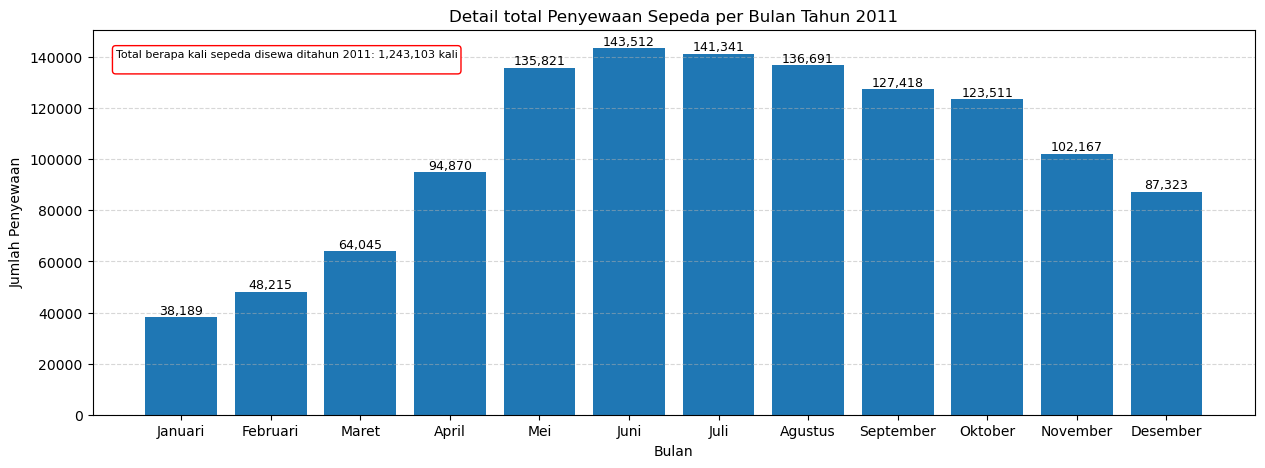

In [333]:
plt.figure(figsize=(15,5))

Chart2011 = plt.bar(tahun2011['bulan'], tahun2011['cnt'])

plt.title('Detail total Penyewaan Sepeda per Bulan Tahun 2011')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.grid(axis='y', linestyle='--', alpha=0.5)

for bar in Chart2011:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height):,}',
        ha='center',
        va='bottom',
        fontsize=9
    )

info_text = (
    f"Total berapa kali sepeda disewa ditahun 2011: {int(total_2011):,} kali\n"
)

plt.text(
    0.02, 0.95,
    info_text,
    transform=plt.gca().transAxes,
    va='top',
    fontsize=8,
    bbox=dict(
        boxstyle='round',
        facecolor='white',
        edgecolor='red'
    )
)

plt.show()

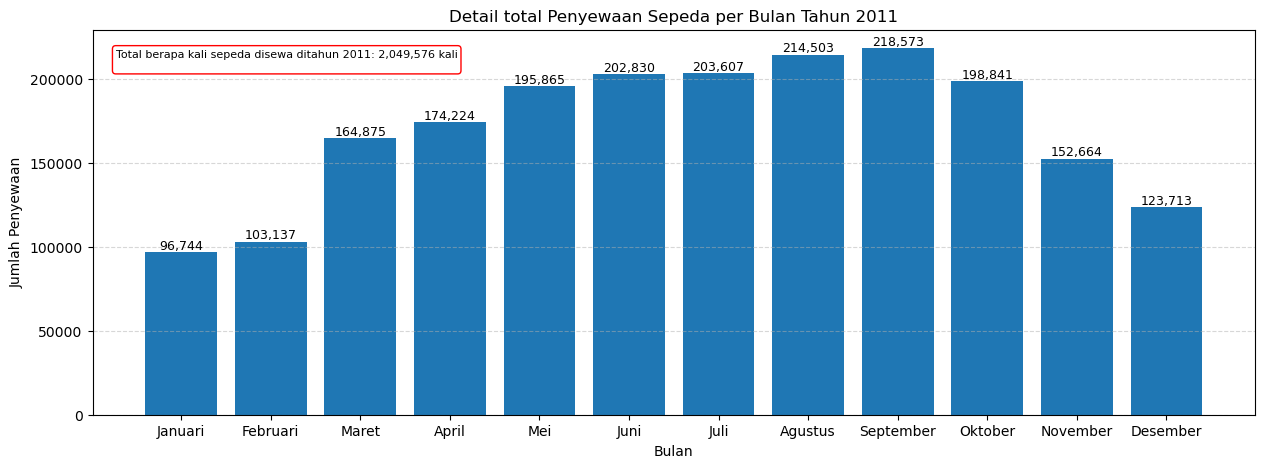

In [334]:
plt.figure(figsize=(15,5))

Chart2012 = plt.bar(tahun2012['bulan'], tahun2012['cnt'])

plt.title('Detail total Penyewaan Sepeda per Bulan Tahun 2011')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.grid(axis='y', linestyle='--', alpha=0.5)

for bar in Chart2012:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height):,}',
        ha='center',
        va='bottom',
        fontsize=9
    )

info_text = (
    f"Total berapa kali sepeda disewa ditahun 2011: {int(total_2012):,} kali\n"
)

plt.text(
    0.02, 0.95,
    info_text,
    transform=plt.gca().transAxes,
    va='top',
    fontsize=8,
    bbox=dict(
        boxstyle='round',
        facecolor='white',
        edgecolor='red'
    )
)

plt.show()

#### **Insight:**
**Pertumbuhan signifikan dari 2011 ke 2012**
- Total penyewaan **2011: 1.243.103 kali**
- Total penyewaan **2012: 2.049.576 kali**


**Pola musiman konsisten di kedua tahun**
- Penyewaan **rendah di awal tahun pada bulan Januari - Februari**. walaupun ditahun 2011 lonjakan nya terjadi pada bulan April dan naik ,lagi pada bulan mei (naik secara bertahap tapi tidak secara signifikan), beda dengan tahun 2012 dimana di bulan maret langsung terjadi lonjakan penyewaan. Hal ini dapat kita tahu kalau penyewaan mulai meningkat mulai pada **Maret - Mei**.
- Penyewaan **Puncak penyewaan terjadi di pertengahan tahun (Juni - Juli (2011) & Agustus - September (2012))**, Lalu kembali menurun kembali menjelang **akhir tahun (Oktober - Desember)**. Ini menunjukkan pengaruh kuat faktor cuaca terhadap penggunaan sepeda yang nanti bakal kita bahas di next pertanyaan.

**Tahun 2012 selalu lebih tinggi di setiap bulan**
- Pada setiap bulan, jumlah penyewaan 2012 **selalu di atas 2011**.Ini menunjukkan peningkatan bukan hanya karena satu bulan tertentu,

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

#### Visualisai 1: Perbandingan total penyewaan disetiap cuaca per tahun

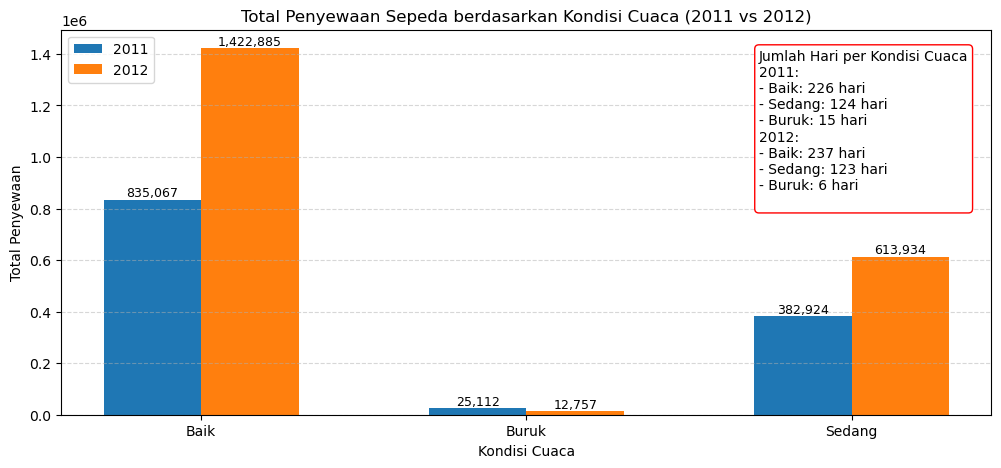

In [335]:
label = cuaca_2011['weather_category']
x = np.arange(len(label))
width = 0.3

plt.figure(figsize=(12,5))

bars1 = plt.bar(
    x - width/2,
    cuaca_2011['cnt'],
    width,
    label='2011'
)

bars2 = plt.bar(
    x + width/2,
    cuaca_2012['cnt'],
    width,
    label='2012'
)

info_text = (
    "Jumlah Hari per Kondisi Cuaca\n"
    "2011:\n"
    f"- Baik: {hari_2011.loc['Baik','total_hari']} hari\n"
    f"- Sedang: {hari_2011.loc['Sedang','total_hari']} hari\n"
    f"- Buruk: {hari_2011.loc['Buruk','total_hari']} hari\n"
    "2012:\n"
    f"- Baik: {hari_2012.loc['Baik','total_hari']} hari\n"
    f"- Sedang: {hari_2012.loc['Sedang','total_hari']} hari\n"
    f"- Buruk: {hari_2012.loc['Buruk','total_hari']} hari\n"
)

plt.text(
    0.75, 0.95,
    info_text,
    transform=plt.gca().transAxes,
    va='top',
    fontsize=10,
    bbox=dict(
        boxstyle='round',
        facecolor='white',
        edgecolor='red'
    )
)

plt.title('Total Penyewaan Sepeda berdasarkan Kondisi Cuaca (2011 vs 2012)')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Penyewaan')
plt.xticks(x, label)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()

for bars in (bars1, bars2):
    for bar in bars:
        h = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            h,
            f'{int(h):,}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.show()


#### Visualisasi 2: Total hari berdasarkan cuaca per bulan pada tahun 2011

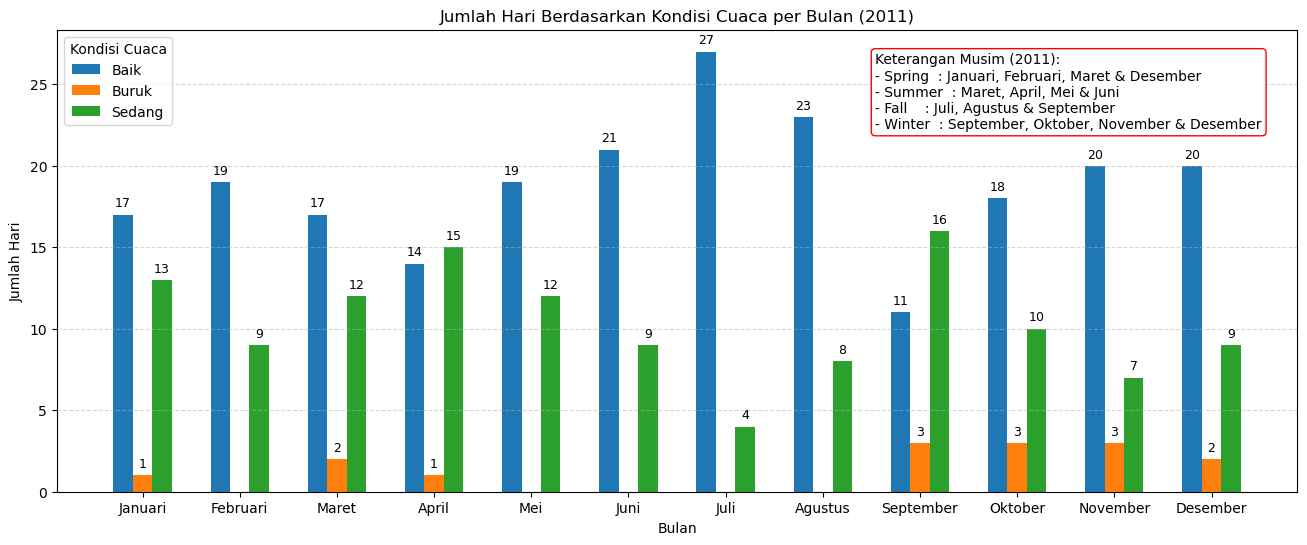

In [336]:
# Urutan bulan berdasarkan mapping 
bulan_order = list(month_map.values())
data_bulan_cuaca2011['bulan'] = pd.Categorical(data_bulan_cuaca2011['bulan'],categories=bulan_order)

pivot_bulan = (data_bulan_cuaca2011.pivot(index='bulan', columns='weather_category', values='day_total'))

x = np.arange(len(pivot_bulan.index))
width = 0.2

plt.figure(figsize=(16,6))

for i, cuaca in enumerate(label):
    bars = plt.bar(
        x + (i - 1) * width,
        pivot_bulan[cuaca],
        width,
        label=cuaca
    )

    for bar in bars:
        h = bar.get_height()
        if h > 0:
            plt.text(
                bar.get_x() + bar.get_width()/2,
                h + 0.3,
                int(h),
                ha='center',
                va='bottom',
                fontsize=9
            )

plt.title('Jumlah Hari Berdasarkan Kondisi Cuaca per Bulan (2011)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Hari')
plt.xticks(x, pivot_bulan.index)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Kondisi Cuaca')

season_info2011 = (
    "Keterangan Musim (2011):\n"
    "- Spring  : Januari, Februari, Maret & Desember\n"
    "- Summer  : Maret, April, Mei & Juni\n"
    "- Fall    : Juli, Agustus & September\n"
    "- Winter  : September, Oktober, November & Desember"
)

plt.text(
    0.66, 0.95,
    season_info2011,
    transform=plt.gca().transAxes,
    va='top',
    fontsize=10,
    bbox=dict(
        boxstyle='round',
        facecolor='white',
        edgecolor='red'
    )
)

plt.show()


#### Visualisasi 3: Rata rata penyewaan berdasarkan cuaca per bulan pada tahun 2011

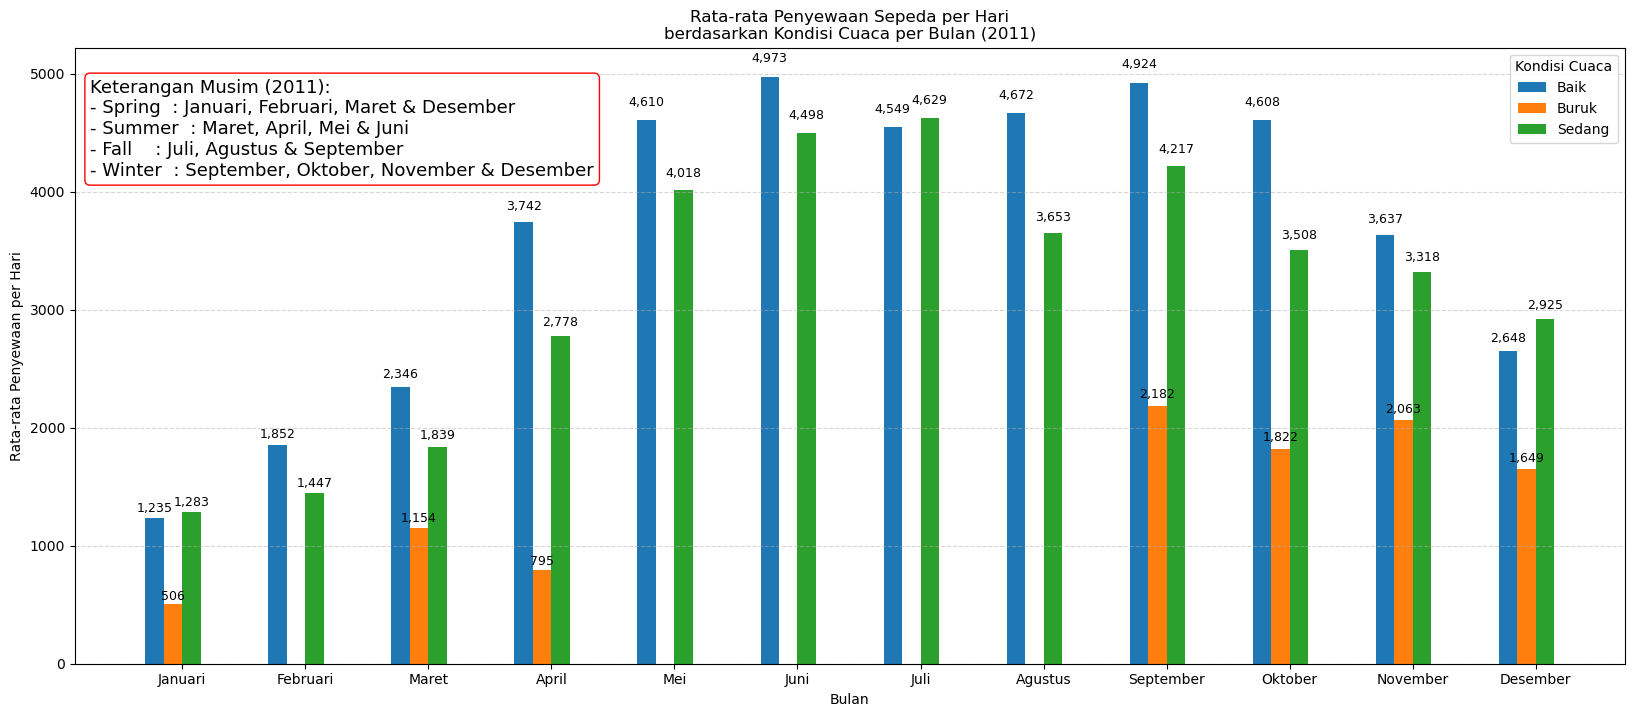

In [337]:
rata_bulan_cuaca2011['bulan'] = pd.Categorical(rata_bulan_cuaca2011['bulan'],categories=bulan_order,ordered=True)

pivot_avg = rata_bulan_cuaca2011.pivot(index='bulan',columns='weather_category',values='rata_perhari')

for c in label:
    if c not in pivot_avg.columns:
        pivot_avg[c] = 0
pivot_avg = pivot_avg[label]

x = np.arange(len(pivot_avg.index))
width = 0.15

plt.figure(figsize=(20,8))

for i, cuaca in enumerate(label):
    bars = plt.bar(
        x + (i - 1.5) * width,
        pivot_avg[cuaca],
        width,
        label=cuaca
    )

    for bar in bars:
        h = bar.get_height()
        if h > 0:
            plt.text(
                bar.get_x() + bar.get_width()/2,
                h + (0.02 * h if h != 0 else 0),
                f'{int(h):,}',
                ha='center',
                va='bottom',
                fontsize=9
            )

plt.title('Rata-rata Penyewaan Sepeda per Hari\nberdasarkan Kondisi Cuaca per Bulan (2011)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewaan per Hari')
plt.xticks(x, pivot_avg.index)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Kondisi Cuaca')

plt.text(
    0.01, 0.95,
    season_info2011,
    transform=plt.gca().transAxes,
    va='top',
    fontsize=13,
    bbox=dict(
        boxstyle='round',
        facecolor='white',
        edgecolor='red'
    )
)

plt.show()


#### Visualisasi 4: Total Penyewaan berdasarkan cuaca per bulan pada tahun 2011

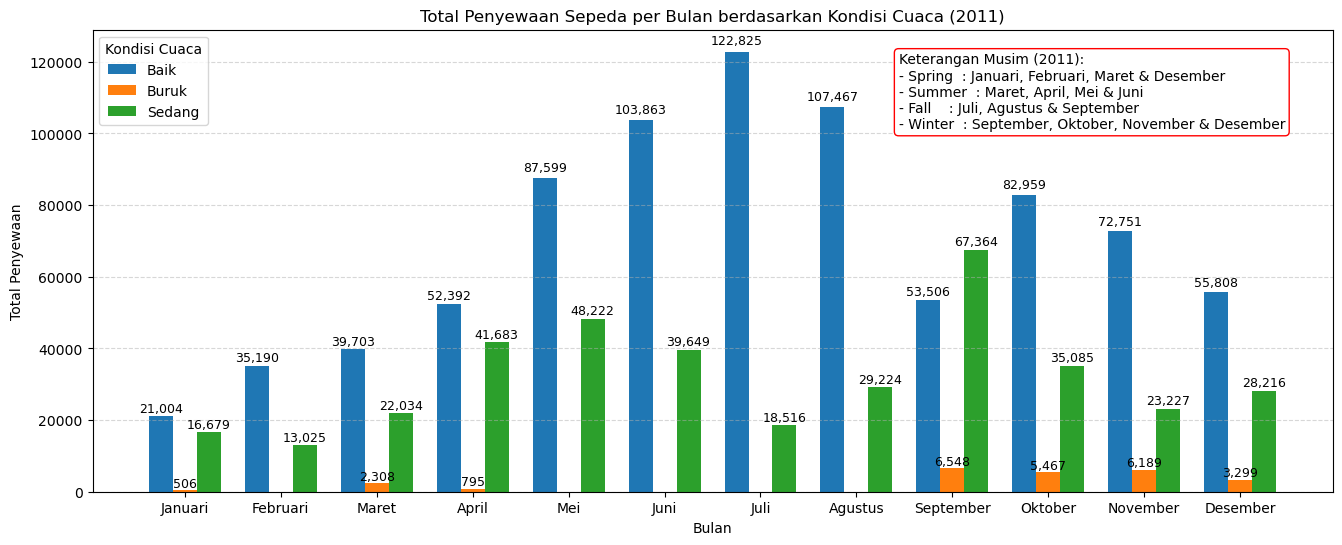

In [338]:
total_bulan_cuaca2011['bulan'] = pd.Categorical(total_bulan_cuaca2011['bulan'],categories=bulan_order,ordered=True)

pivot_total = (total_bulan_cuaca2011.pivot(index='bulan', columns='weather_category', values='total_rental'))

x = np.arange(len(pivot_total.index))
width = 0.25

plt.figure(figsize=(16,6))

for i, cuaca in enumerate(label):
    bars = plt.bar(
        x + (i - 1) * width,
        pivot_total[cuaca],
        width,
        label=cuaca
    )

    for bar in bars:
        h = bar.get_height()
        if h > 0:
            plt.text(
                bar.get_x() + bar.get_width()/2,
                h + (0.01 * h),
                f'{int(h):,}',
                ha='center',
                va='bottom',
                fontsize=9
            )

plt.title('Total Penyewaan Sepeda per Bulan berdasarkan Kondisi Cuaca (2011)')
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan')
plt.xticks(x, pivot_total.index)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Kondisi Cuaca')

plt.text(
    0.65, 0.95,
    season_info2011,
    transform=plt.gca().transAxes,
    va='top',
    fontsize=10,
    bbox=dict(
        boxstyle='round',
        facecolor='white',
        edgecolor='red'
    )
)

plt.show()


#### Visualisasi 5: Total hari berdasarkan cuaca per bulan pada tahun 2012

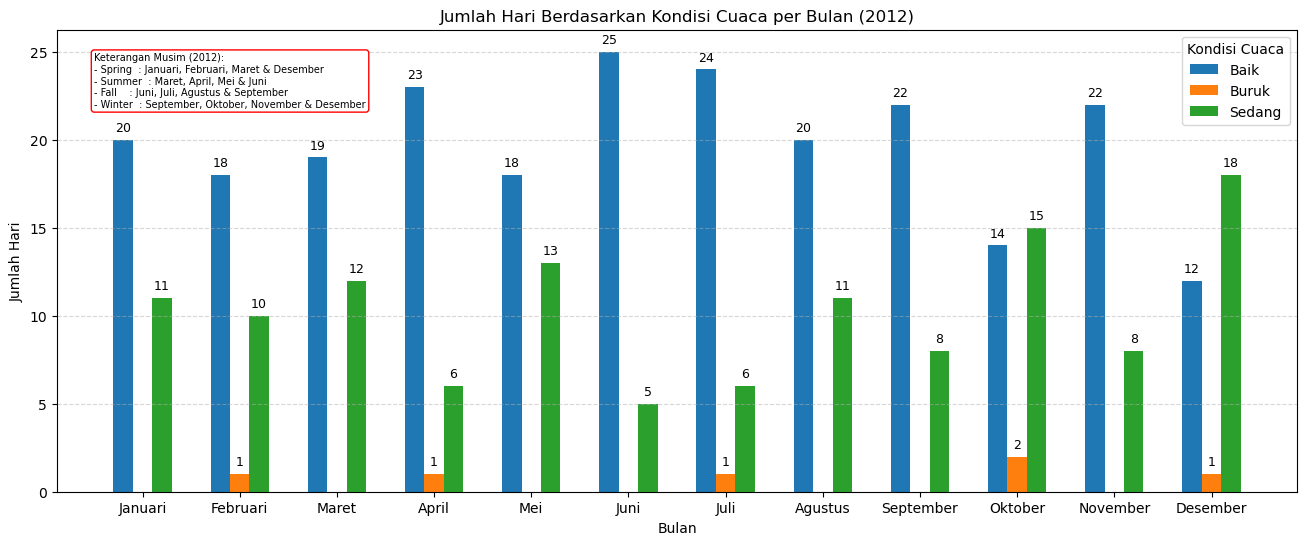

In [339]:
# sama perlakuan nya seperti diatas namun untuk data tahun 2012
data_bulan_cuaca2012['bulan'] = pd.Categorical(data_bulan_cuaca2012['bulan'],categories=bulan_order)

pivot_bulan = (data_bulan_cuaca2012.pivot(index='bulan', columns='weather_category', values='day_total'))

x = np.arange(len(pivot_bulan.index))
width = 0.2

plt.figure(figsize=(16,6))
for i, cuaca in enumerate(label):
    bars = plt.bar(
        x + (i - 1) * width,
        pivot_bulan[cuaca],
        width,
        label=cuaca
    )

    for bar in bars:
        h = bar.get_height()
        if h > 0:
            plt.text(
                bar.get_x() + bar.get_width()/2,
                h + 0.3,
                int(h),
                ha='center',
                va='bottom',
                fontsize=9
            )

plt.title('Jumlah Hari Berdasarkan Kondisi Cuaca per Bulan (2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Hari')
plt.xticks(x, pivot_bulan.index)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Kondisi Cuaca')

season_info2012 = (
    "Keterangan Musim (2012):\n"
    "- Spring  : Januari, Februari, Maret & Desember\n"
    "- Summer  : Maret, April, Mei & Juni\n"
    "- Fall    : Juni, Juli, Agustus & September\n"
    "- Winter  : September, Oktober, November & Desember"
)

plt.text(
    0.03, 0.95,
    season_info2012,
    transform=plt.gca().transAxes,
    va='top',
    fontsize=7,
    bbox=dict(
        boxstyle='round',
        facecolor='white',
        edgecolor='red'
    )
)

plt.show()


#### Visualisasi 6: Rata rata penyewaan berdasarkan cuaca per bulan pada tahun 2012

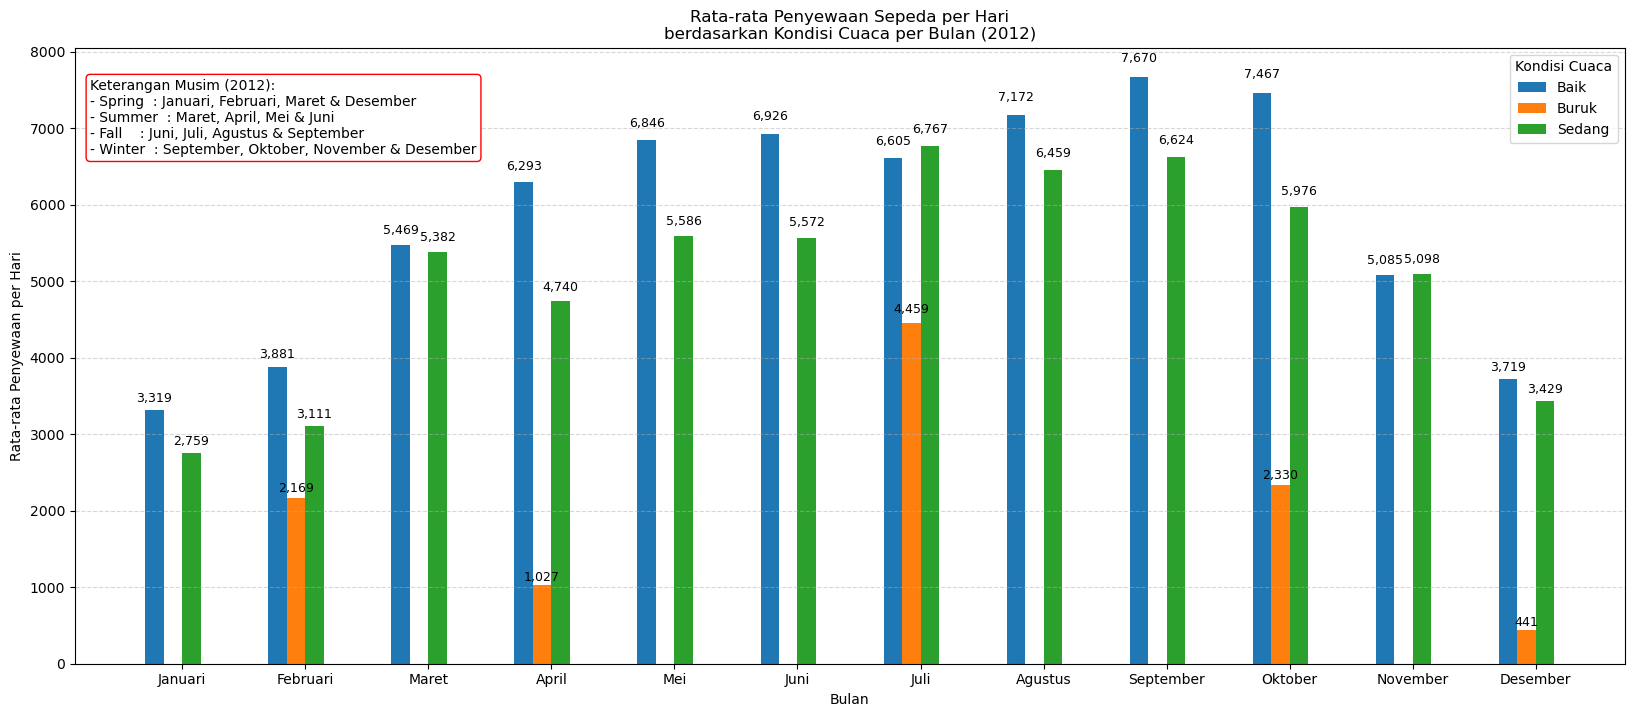

In [340]:
rata_bulan_cuaca2012['bulan'] = pd.Categorical(rata_bulan_cuaca2012['bulan'],categories=bulan_order,ordered=True)

pivot_avg = rata_bulan_cuaca2012.pivot(index='bulan',columns='weather_category',values='rata_perhari')

for c in label:
    if c not in pivot_avg.columns:
        pivot_avg[c] = 0
pivot_avg = pivot_avg[label]

x = np.arange(len(pivot_avg.index))
width = 0.15

plt.figure(figsize=(20,8))

for i, cuaca in enumerate(label):
    bars = plt.bar(
        x + (i - 1.5) * width,
        pivot_avg[cuaca],
        width,
        label=cuaca
    )

    for bar in bars:
        h = bar.get_height()
        if h > 0:
            plt.text(
                bar.get_x() + bar.get_width()/2,
                h + (0.02 * h if h != 0 else 0),
                f'{int(h):,}',
                ha='center',
                va='bottom',
                fontsize=9
            )

plt.title('Rata-rata Penyewaan Sepeda per Hari\nberdasarkan Kondisi Cuaca per Bulan (2012)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewaan per Hari')
plt.xticks(x, pivot_avg.index)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Kondisi Cuaca')

plt.text(
    0.01, 0.95,
    season_info2012,
    transform=plt.gca().transAxes,
    va='top',
    fontsize=10,
    bbox=dict(
        boxstyle='round',
        facecolor='white',
        edgecolor='red'
    )
)

plt.show()


#### Visualisasi 7: Total penyewaan berdasarkan cuaca per bulan pada tahun 2012

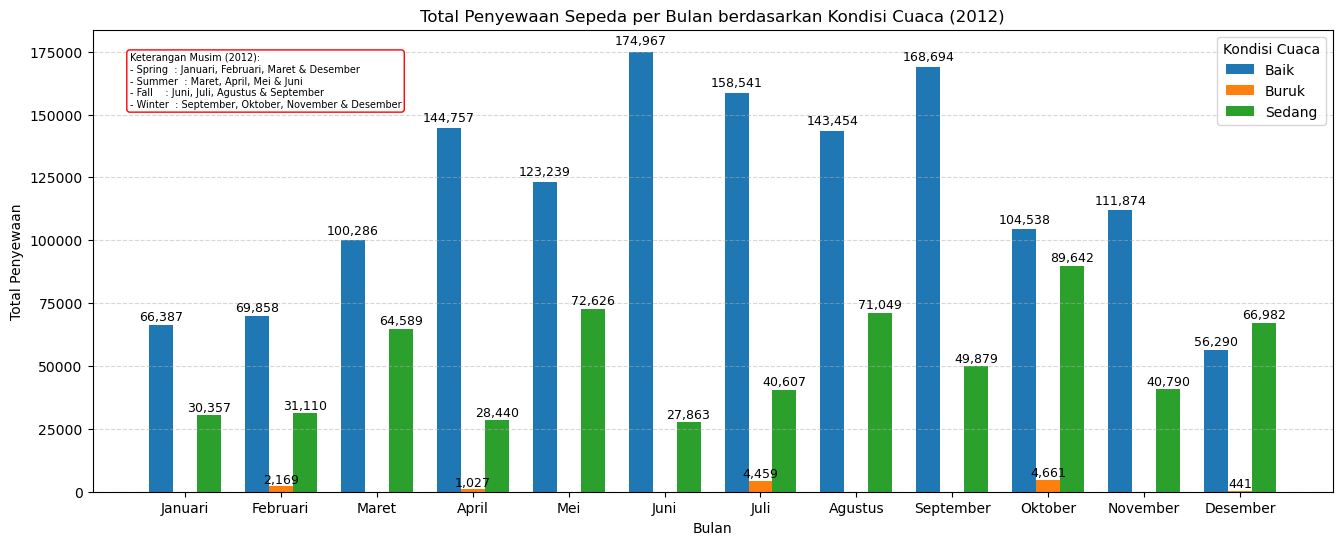

In [341]:
total_bulan_cuaca2012['bulan'] = pd.Categorical(total_bulan_cuaca2012['bulan'],categories=bulan_order,ordered=True)

pivot_total = (total_bulan_cuaca2012.pivot(index='bulan', columns='weather_category', values='total_rental'))

x = np.arange(len(pivot_total.index))
width = 0.25

plt.figure(figsize=(16,6))

for i, cuaca in enumerate(label):
    bars = plt.bar(
        x + (i - 1) * width,
        pivot_total[cuaca],
        width,
        label=cuaca
    )

    for bar in bars:
        h = bar.get_height()
        if h > 0:
            plt.text(
                bar.get_x() + bar.get_width()/2,
                h + (0.01 * h),
                f'{int(h):,}',
                ha='center',
                va='bottom',
                fontsize=9
            )

plt.title('Total Penyewaan Sepeda per Bulan berdasarkan Kondisi Cuaca (2012)')
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan')
plt.xticks(x, pivot_total.index)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Kondisi Cuaca')

plt.text(
    0.03, 0.95,
    season_info2012,
    transform=plt.gca().transAxes,
    va='top',
    fontsize=7,
    bbox=dict(
        boxstyle='round',
        facecolor='white',
        edgecolor='red'
    )
)

plt.show()

#### **Insight:**
**Dominasi Cuaca terletak pada Cuaca Baik**
- Di kedua tahun (2011 & 2012), penyewaan menunjukan bahwa **Cuaca Baik** menempati posisi tertinggi, disusul oleh **Cuaca Sedang**, dan **Cuaca Buruk** di posisi terendah. Kondisi cuaca buruk menyebabkan penurunan drastis, di mana rata rata penyewaan bisa kehilangan **40% hingga 75% potensi penyewaan** dibandingkan saat cuaca baik dan sedang. kita dari sini tahu bahwa pengaruh cuaca yang buruk memungkinkan individu lebih memilih transportasi lain untuk menghindari terjadinya hal yang tidak baik

**Titik Puncak Musim Terbaik**
- Titik penyewaan tertinggi terjadi pada rentang Juni - Juli (2011) dan Agustus - September (2012).
- Pada rentang bulan tersebut ini **cuaca buruk tidak ditemukan (0 hari)**. Ketiadaan risiko hujan/salju pada bulan-bulan tersebut menjadi pendorong utama masyarakat untuk memilih melakukan penyewaan sepeda
- **Musim Summer dan Fall** adalah musim yang sangat mendukung para individu untuk melakuakn penyewaans sepeda dimana, dengan musim **Fall (Gugur)** menjadi periode yang paling dominan karena kondisi udara yang lebih mendukung untuk aktivitas luar ruangan secara berkelanjutan.

**Pengaruh Cuaca pada Rata-Rata Harian Penyewaan**
- **Tahun 2011:** Memasuki Mei hingga Oktober, rata-rata penyewaan harian pada kondisi cuaca baik secara konsisten melampaui angka **4.000 unit/hari**.
- **Tahun 2012:** Terjadi peningkatan lebih signifikasn dari Maret hingga November rata-rata harian meningkat ke angka **5.000 unit/hari** dengan periode yang lebih panjang.
- Simpel nya pada tahun 2012 menunjukkan adanya peningkatan **kepercayaan dan kebiasaan pengguna (user behavior) yang semakin kuat**.

**Karakteristik Musim Transisi & Ekstrem**
- **Musim Summer & Fall** Pada musim Summer dan terutama Fall menjadi yang paling dominan karena kombinasi **cuaca baik** dengan suhu yang sejuk (tidak terlalu panas seperti Summer), sehingga rata-rata penyewaan harian tetap tinggi meskipun langit sedang mendung (Cuaca Sedang). Di musim ini, meskipun terjadi cuaca "Sedang", masyarakat tetap antusias bersepeda karena risiko hujan mendadak sangat kecil
- Frekuensi cuaca buruk berada pada **Musim Winter** Selain cuaca buruk, suhu ekstrem di musim dingin membuat cuaca "Baik" sekalipun tetap tidak menarik bagi pengguna. Akibatnya, saat cuaca buruk tiba, penyewaan bisa menurun.
- **Musim Spring** adalah masa transisi. Angka penyewaan di musim ini mulai naik dibandingkan Winter seiring munculnya lebih banyak hari dengan cuaca "Baik", namun belum bisa menyamai Summer/Fall karena masih berada pada posisi pemulihan dari winter.

**Pengaruh Kondisi Cuaca Per Musim**
- **Pada Musim Puncak (Summer/Fall):** Cuaca "Sedang" (mendung) tidak terlalu menurunkan minat orang. Data menunjukkan rata-rata harian pada cuaca sedang di musim ini masih sangat tinggi (bahkan menembus 6.000+ di Sept 2012).
* **Pada Musim Rendah (Winter/Spring):** Cuaca "Sedang" atau "Buruk" berdampak **double hit**. Pengguna sudah enggan karena suhu dingin, ditambah lagi dengan kondisi langit yang tidak cerah, sehingga mereka lebih memilih moda transportasi tertutup.

# Analisis Lanjutan (Opsional,)
#### Disini saya ingin mencari tahu kira kira pada jam berapa terjadi penyewaan tertinggi

In [342]:
FrameKedua = pd.read_csv('hour.csv')
FrameKedua.head(25)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


#### Saya mencoba mengambil satu sample di total penyewaan tertinggi dan dimusim yang sama yaitu musim fall.
- Tahun 2011 -> puncak tertinggi terjadi di bulan Juli 
- Tahun 2012 -> puncak tertinggi terjadi di bulan Juni (tapi kita berfokus di musim fall)

In [343]:
# cek bulan juli 2011
data_juli_2011 = FrameKedua[(FrameKedua['mnth'] == 7) & (FrameKedua['season'] == 3) & (FrameKedua['yr'] == 0)]
hourly_juli = data_juli_2011.groupby('hr')['cnt'].sum().reset_index()
hourly_juli

# cek bulan juni 2012
data_juni_2012 = FrameKedua[(FrameKedua['mnth'] == 6) & (FrameKedua['season'] == 3) & (FrameKedua['yr'] == 1)]
hourly_juni = data_juni_2012.groupby('hr')['cnt'].sum().reset_index()
hourly_juni

,hr,cnt
0,0,837
1,1,508
2,2,366
3,3,180
4,4,118
5,5,318
6,6,1288
7,7,3515
8,8,4897
9,9,2957


### cek 1 bulan kemudian

In [344]:
# cek bulan agustus 2011
data_agustus_2011 = FrameKedua[(FrameKedua['mnth'] == 8) & (FrameKedua['season'] == 3) & (FrameKedua['yr'] == 0)]
hourly_agustus = data_agustus_2011.groupby('hr')['cnt'].sum().reset_index()
hourly_agustus

# cek bulan juli 2012
data_juli_2012 = FrameKedua[(FrameKedua['mnth'] == 7) & (FrameKedua['season'] == 3) & (FrameKedua['yr'] == 1)]
hourly_juli = data_juli_2012.groupby('hr')['cnt'].sum().reset_index()
hourly_juli

,hr,cnt
0,0,2878
1,1,1637
2,2,1187
3,3,550
4,4,276
5,5,992
6,6,3591
7,7,9915
8,8,15498
9,9,9483


#### Visualisasi 1: Perbandingan penyewaan di bulan puncak tertinggi penyewaan (Musim Fall) Juli (2011) & Juni (2012)

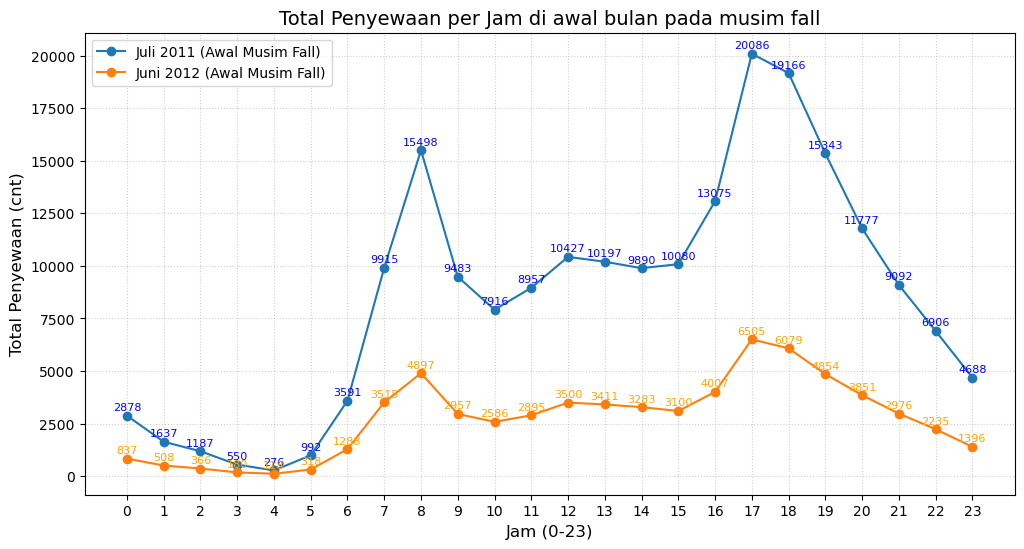

In [345]:
plt.figure(figsize=(12, 6))
plt.plot(hourly_juli['hr'], hourly_juli['cnt'], marker='o', label='Juli 2011 (Awal Musim Fall)')
for x, y in zip(hourly_juli['hr'], hourly_juli['cnt']):
    plt.text(x, y + 150, f'{y}', ha='center', va='bottom', fontsize=8, color='blue')

plt.plot(hourly_juni['hr'], hourly_juni['cnt'], marker='o', label='Juni 2012 (Awal Musim Fall)')
for x, y in zip(hourly_juni['hr'], hourly_juni['cnt']):
    plt.text(x, y + 150, f'{y}', ha='center', va='bottom', fontsize=8, color='orange')
    
plt.title('Total Penyewaan per Jam di awal bulan pada musim fall', fontsize=14)
plt.xlabel('Jam (0-23)', fontsize=12)
plt.ylabel('Total Penyewaan (cnt)', fontsize=12)
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

plt.show()

#### Visualisasi 2: Perbandingan 1 bulan kemudian penyewaan (Musim Fall) Agustus (2011) & Juli (2012)

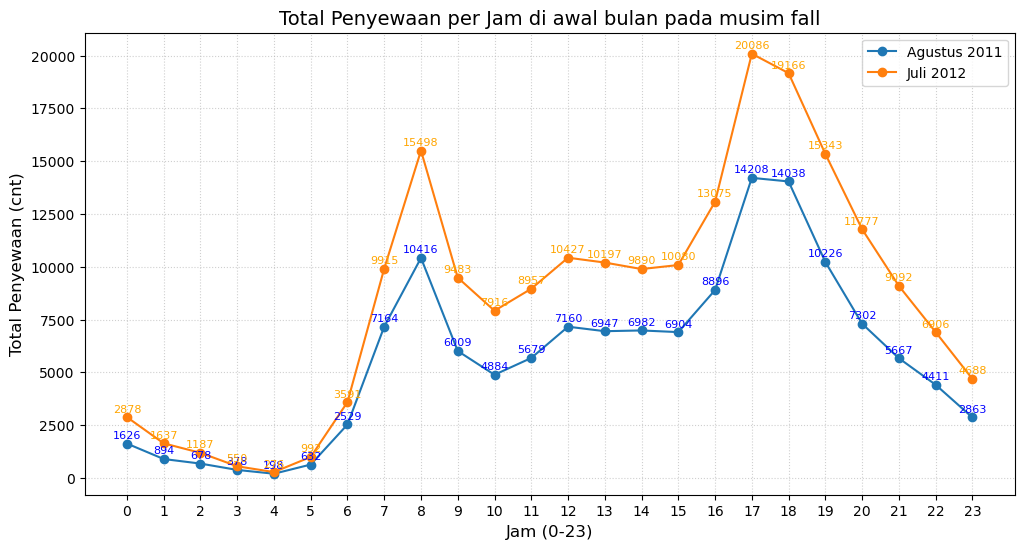

In [346]:
plt.figure(figsize=(12, 6))
plt.plot(hourly_agustus['hr'], hourly_agustus['cnt'], marker='o', label='Agustus 2011')
for x, y in zip(hourly_agustus['hr'], hourly_agustus['cnt']):
    plt.text(x, y + 150, f'{y}', ha='center', va='bottom', fontsize=8, color='blue')

plt.plot(hourly_juli['hr'], hourly_juli['cnt'], marker='o', label='Juli 2012')
for x, y in zip(hourly_juli['hr'], hourly_juli['cnt']):
    plt.text(x, y + 150, f'{y}', ha='center', va='bottom', fontsize=8, color='orange')
    
plt.title('Total Penyewaan per Jam di awal bulan pada musim fall', fontsize=14)
plt.xlabel('Jam (0-23)', fontsize=12)
plt.ylabel('Total Penyewaan (cnt)', fontsize=12)
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

plt.show()

### **insight**
**Pola Waktu penyewaan**
- Lonjakan Penyewaan Terjadi tajam pada pukul **08:00**. Hal ini mengindikasikan bahwa sepeda menjadi pilihan transportasi utama bagi masyarakat sekitar untuk berangkat beraktivitas atau bekerja diawal pagi mereka
- Aktivitas Jam Kerja Setelah pukul 08:00 hingga sore hari, angka penyewaan cenderung stabil di bawah level jam sibuk. Ini menunjukkan bahwa mayoritas pengguna sedang berada dalam durasi kerja tetap, sehingga mobilitas di luar ruangan berkurang secara signifikan.
- Puncak Tertinggi pada saat Tren mencapai titik maksimalnya pada pukul **17:00** hingga **18:00**. Tingginya angka pada jam ini kemungkinan besar disebabkan oleh perilaku pengguna yang menghindari kepadatan transportasi umum dan kemacetan jalan raya saat jam pulang kantor dengan memilih bersepeda.
- Setelah pukul 19:00 tingkat penyewaan menurun secara bertahap seiring dengan jam kerja pulang kerja

## Conclusion

**Conclution pertanyaan 1**
- Peningkatan total penyewaan dari 1,24 juta menjadi 2,05 juta (kenaikan sekitar 65%) menunjukkan bahwa layanan bike sharing ini sedang dalam fase pertumbuhan yang sangat sehat. Kenaikan yang konsisten di setiap bulan (di mana 2012 selalu lebih tinggi dari 2011) membuktikan bahwa ini bukan sekadar tren sesaat, melainkan adanya peningkatan basis pengguna aktif atau loyalitas pelanggan yang kuat.
-Pola Musiman yang Terprediksi
Meskipun ada perbedaan titik lonjakan dimana awal Tahun: Masa persiapan/transisi, tengah Tahun: Masa puncak operasional (Peak Season) dan Akhir Tahun: Masa penurunan. Konklusi ini sangat penting untuk perencanaan stok sepeda, jadwal perawatan (maintenance), dan alokasi staf lapangan.

**Conclution pertanyaan 2**
- Cuaca adalah "Penentu Utama" penyewaan, Kondisi cuaca bukan sekadar faktor pendukung, melainkan penentu kelangsungan operasional. Cuaca buruk menyebabkan kehilangan potensi pendapatan. Hal ini menunjukkan bahwa bisnis penyewaan sepeda sangat rentan terhadap risiko eksternal iklim, di mana pengguna secara sadar memprioritaskan keamanan dan kenyamanan transportasi tertutup saat kondisi tidak kondusif.
- The Golden Pendapatan berada pada Musim Fall dan Musim Panas Summer dimana Musim Fall adalah periode emas bagi bisnis ini. Kesimpulan unik yang bisa diambil adalah kenyamanan suhu lebih penting daripada sekadar langit cerah. Pada Musim Gugur, udara yang sejuk membuat pengguna tetap mau bersepeda meskipun cuaca sedang mendung (Cuaca Sedang). Sebaliknya, pada Musim Dingin (Winter), langit cerah sekalipun tidak cukup untuk menarik minat karena faktor suhu ekstrem. Ini membuktikan adanya ambang batas toleransi fisik pengguna terhadap cuaca.
- Efek pada Musim Transisi dimana Musim dingin dan musim semi membawa resiko pada bisnis dimana secara psikologis pengguna yang masih dalam fase "pemulihan" dari suhu ekstrem membuat sensitivitas terhadap cuaca menjadi sangat tinggi. Satu hari cuaca buruk di musim dingin berdampak jauh lebih fatal bagi total pendapatan bulanan dibandingkan satu hari cuaca buruk di musim panas.

**Conclution tambahan**
- Penggunaan Sepeda disini berfungsi sebagai transportasi yang bukan sekadar alat rekreasi. Pola penyewaan yang dimiliki pada jam 08:00 dan 17:00 - 18:00 adalah karakteristik khas pergerakan pekerja atau pelajar menjadikan sepeda sebagai pilihan transportasi.
- Stabilitas angka penyewaan di bawah level jam sibuk antara pukul 09:00 hingga 16:00 memberikan informasi operasional yang pentin dimana tim lapangan dapat memindahkan sepeda dari stasiun yang penuh ke stasiun yang kosong tanpa mengganggu mayoritas pengguna yang sedang bekerja.
- Penurunan Bertahap setelah Jam 19:00 Penggunaan setelah jam ini kemungkinan besar bersifat opsional atau rekreasi ringan.

**Rekomendasi & Strategi pada layanan ini**
- Optimasi Maintenance, Lakukan perawatan besar-besaran pada sepeda di bulan Januari - Februari (saat permintaan rendah) agar seluruh sepeda siap saat lonjakan mulai terjadi di bulan Maret.
- Manajemen Kapasitas & Optimalisasi, memastikan ketersediaan sepeda di stasiun-stasiun populer mencapai titik maksimal pada bulan Agustus - September untuk menghindari hilangnya potensi individu akibat kehabisan sepeda.
- Loyalty Program di Musim Winter, Untuk mengatasi efek Double Hit di musim winter atau summer, perusahaan bisa memberikan diskon khusus kayak "Pejuang Musim Dingin" bagi pengguna rutin agar angka penyewaan tidak jatuh terlalu drastis.
- Optimalisasi Stok di Jam Kritis, Memastikan pada pukul 07:30 stasiun di area pemukiman memiliki ketersediaan sepeda maksimal, dan pada pukul 16:30 stasiun di area perkantoran/pusat bisnis sudah terisi penuh untuk menyambut lonjakan pulang kantor.
- Pembuatan atau Perbaikan Infrastruktur Jalur Sepeda, Hasil ini bisa digunakan untuk memberi masukan kepada pengelola kota bahwa jalur sepeda sangat krusial pada rute-rute perkantoran karena terbukti mampu memecah kepadatan transportasi umum di jam sibuk.